# An Introduction to the `srlearn` Python Package

Alexander L. Hayes &mdash; Health Informatics Ph.D. Student &mdash; Indiana University Bloomington  
Sriraam Natarajan &mdash; Professor of Computer Science at the University of Texas at Dallas

Email: [hayesall@iu.edu](mailto:hayesall@iu.edu)  
GitHub: [https://github.com/hayesall/srlearn](https://github.com/hayesall/srlearn)

This notebook accompanies several parts of the user guide, refer to the following pages for more information:

- [Getting Started (srlearn docs)](https://srlearn.readthedocs.io/en/latest/getting_started.html)
- [User Guide (srlearn docs)](https://srlearn.readthedocs.io/en/latest/user_guide.html)

## Quick-Start

A few things are required before executing.

- Unix-based system (this has not been sufficiently tested in a Windows environment)
- Java (>=1.8)
- Python (3.6, 3.7)

Java should be installed on your system and available on your PATH (if running `java -version` results in a version number printed to the terminal, you are probably fine).

`srlearn` can be installed with `pip`:

```bash
$ pip install srlearn
```

## `srlearn`

In [1]:
import srlearn

### Background Knowledge

**Background Knowledge** currently involves specifying the **modes** for constraining the hypothesis search space. Other parameters such as `max_tree_depth` and `node_size` may be specified here as well, but these would be more appropriate defining as part of a model. In the future, these model-specific parameters may be set elsewhere.

In [2]:
from srlearn import Background

# Modes constrain the search space for hypotheses
toy_cancer_modes = [
    "cancer(+Person).",
    "smokes(+Person).",
    "friends(+Person, -Person).",
    "friends(-Person, +Person).",
]

# Background object includes the modes and some additional parameters for how our domain may look.
bk = Background(
    modes=toy_cancer_modes,
)

print(bk)

setParam: nodeSize=2.
setParam: maxTreeDepth=3.
setParam: numOfClauses=100.
setParam: numOfCycles=100.
usePrologVariables: true.
mode: cancer(+Person).
mode: smokes(+Person).
mode: friends(+Person, -Person).
mode: friends(-Person, +Person).



### Database of clauses

Our next focus should be on *the data*. Data for `srlearn` takes the form of predicate logic. Here the clauses are defined inline the code, but these could just as easily be read from a file or created with a simulator for *reinforcement learning* domains.

In [3]:
from srlearn import Database

train_pos = ["cancer(alice).", "cancer(bob).", "cancer(chuck).", "cancer(fred)."]
train_neg = ["cancer(dan).", "cancer(earl)."]
train_facts = [
    "friends(alice, bob).", "friends(alice, fred).", "friends(chuck, bob).", "friends(chuck, fred).",
    "friends(dan, bob).", "friends(earl, bob).", "friends(bob, alice).", "friends(fred, alice).",
    "friends(bob, chuck).", "friends(fred, chuck).", "friends(bob, dan).", "friends(bob, earl).",
    "smokes(alice).", "smokes(chuck).", "smokes(bob).",
]

# Instantiate a `Database` object
db = Database()

# Set the positive examples, negative examples, and facts for the Database.
db.pos = train_pos
db.neg = train_neg
db.facts = train_facts

print(db)

Positive Examples:
['cancer(alice).', 'cancer(bob).', 'cancer(chuck).', 'cancer(fred).']
Negative Examples:
['cancer(dan).', 'cancer(earl).']
Facts:
['friends(alice, bob).', 'friends(alice, fred).', 'friends(chuck, bob).', 'friends(chuck, fred).', 'friends(dan, bob).', 'friends(earl, bob).', 'friends(bob, alice).', 'friends(fred, alice).', 'friends(bob, chuck).', 'friends(fred, chuck).', 'friends(bob, dan).', 'friends(bob, earl).', 'smokes(alice).', 'smokes(chuck).', 'smokes(bob).']


### Relational Dependency Network Learning

The model API should look familiar if you've worked with [scikit-learn](https://scikit-learn.org/stable/) before. **The only difference** is that instead of passing `X,y` numpy arrays, we pass `Database` objects.

We'll instantiate an RDN to see what some of the default parameters look like:

In [4]:
from srlearn.rdn import BoostedRDNClassifier

# Instantiate an RDN with no parameters.
dn = BoostedRDNClassifier()

print(dn)

BoostedRDNClassifier()


... **but fitting this model will not make sense unless** we specify a **target** and the **background knowledge** we defined earlier.

In [5]:
# Instantiate an RDN with a target to learn, and the background knowledge
dn = BoostedRDNClassifier(
    target="cancer",
    background=bk,
)

# Fit a model with the `fit` method
dn.fit(db)

/home/hayesall/miniconda3/envs/srlearn/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


BoostedRDNClassifier(background=setParam: nodeSize=2.
setParam: maxTreeDepth=3.
setParam: numOfClauses=100.
setParam: numOfCycles=100.
usePrologVariables: true.
mode: cancer(+Person).
mode: smokes(+Person).
mode: friends(+Person, -Person).
mode: friends(-Person, +Person).
,
                     target='cancer')

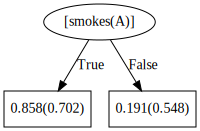

In [6]:
from srlearn.plotting import plot_digraph
from srlearn.plotting import export_digraph

plot_digraph(export_digraph(dn, tree_index=0))

### Testing our model on new data

Now that we've fit a model, we can perform inference to assign probabilities to whether each example should belong to a class.

In [7]:
test_pos = ["cancer(zod).", "cancer(xena).", "cancer(yoda)."]
test_neg = ["cancer(voldemort).", "cancer(watson)."]
test_facts = [
    "friends(zod, xena).", "friends(xena, watson).", "friends(watson, voldemort).", "friends(voldemort, yoda).",
    "friends(yoda, zod).", "friends(xena, zod).", "friends(watson, xena).", "friends(voldemort, watson).",
    "friends(yoda, voldemort).", "friends(zod, yoda).", "smokes(zod).", "smokes(xena).", "smokes(yoda).",
]

test_db = Database()
test_db.pos = test_pos
test_db.neg = test_neg
test_db.facts = test_facts

print(dn.predict_proba(test_db))

/home/hayesall/miniconda3/envs/srlearn/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.88079619 0.88079619 0.88079619 0.3075821  0.3075821 ]
